In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import time

In [2]:
img = cv2.imread("Images/avengers.jpg")
img = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)

# Image Flipping

In [3]:
# Top Down
img2 = cv2.flip(img, 0)
cv2.imshow("Original", img)
cv2.imshow("Image", img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# Left to Right
img2 = cv2.flip(img, 1)
cv2.imshow("Original", img)
cv2.imshow("Image", img2)
cv2.waitKey()
cv2.destroyAllWindows()

# Image Thresholding

In [4]:
def display_img(img, axis='on', show=True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    #plt.margins(1)
    if axis!='on':
        plt.axis('off')
    if show:
        plt.show()

In [6]:
# Mainly used in Optical character recognition
## Global Thresholding => Thresholding applied to every pixel equally

In [7]:
"""
for each pixel in image
do:
if pixel>thresh:
    set a value
else:
    set another value
"""

'\nfor each pixel in image\ndo:\nif pixel>thresh:\n    set a value\nelse:\n    set another value\n'

In [5]:
lena_img = cv2.imread("Images/avengers.jpg")


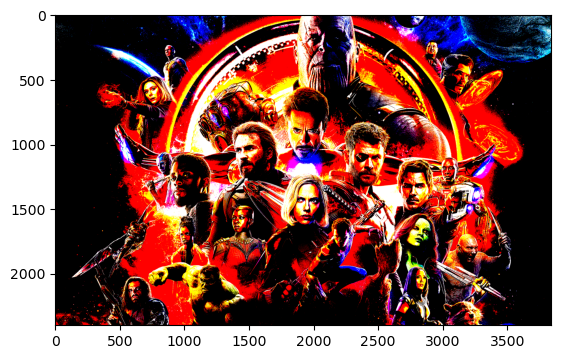

In [9]:
# cv.threshold(img, thresh_value, maxvalue, thresh_type)
# if pixel>120 then 255 else 0
th ,dst = cv2.threshold(lena_img, 120, 255, cv2.THRESH_BINARY); 
display_img(dst) 

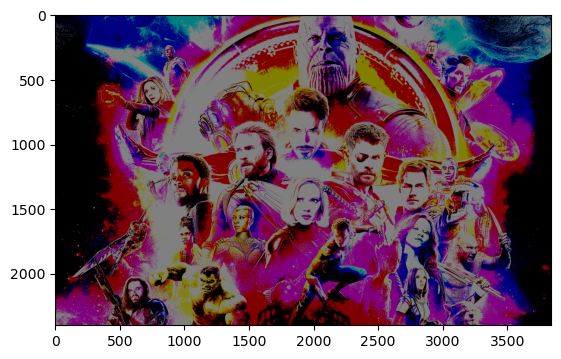

In [19]:
# if pixel>50 then 128 otherwise 0
th, dst = cv2.threshold(lena_img, 50, 128, cv2.THRESH_BINARY); 
display_img(dst)

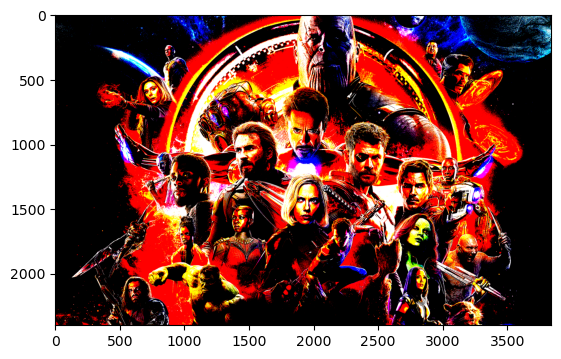

In [20]:
#if pixel >127 then 255 otherwise 0
th, dst = cv2.threshold(lena_img, 127, 255, cv2.THRESH_BINARY); 
display_img(dst)

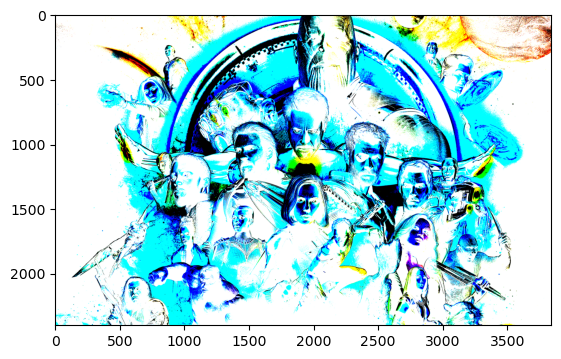

In [21]:
# if pixel >127 then 0 otherwise 255
th, dst = cv2.threshold(lena_img, 127, 255, cv2.THRESH_BINARY_INV); 
display_img(dst)

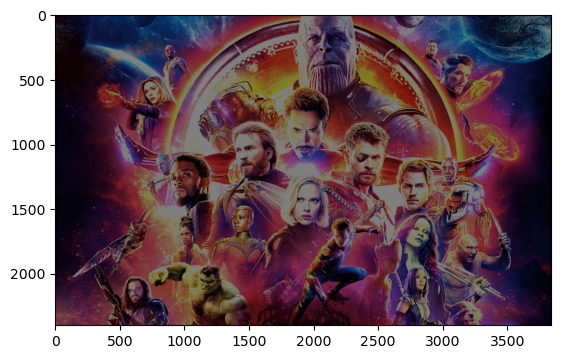

In [22]:
# if pixel >127 then 127 otherwise pixel value. # max value ignored
# 0 is given as max value, but it is ignored in Trunc
th, dst = cv2.threshold(lena_img, 127,0, cv2.THRESH_TRUNC)
display_img(dst)

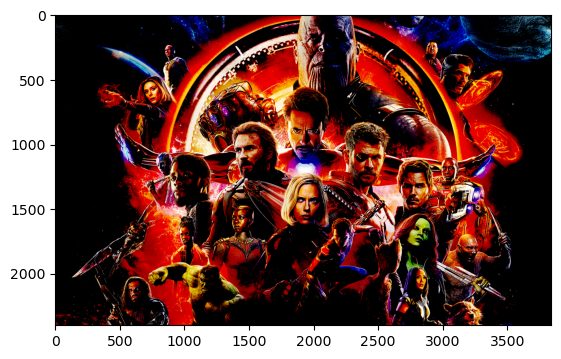

In [23]:
# if pixel>thresh then pixel otherwise 0
# Max value ignored
th, dst = cv2.threshold(lena_img, 127,0, cv2.THRESH_TOZERO)
display_img(dst)

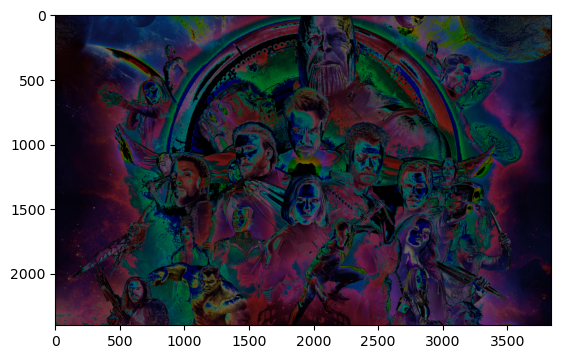

In [24]:
# if pixel>thresh then 0 otherwise pixel
# Max value ignored
th, dst = cv2.threshold(lena_img, 127,0, cv2.THRESH_TOZERO_INV)
display_img(dst)

## Adaptive Thresholding

if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

cv2.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

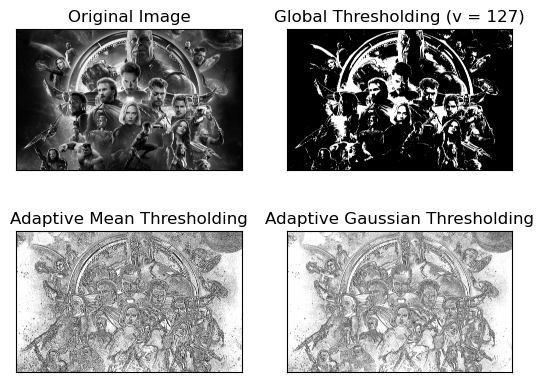

In [10]:
img = cv2.imread("Images/avengers.jpg",0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Binary Operations

In [12]:
rect = np.zeros((400,400), dtype=np.uint8)
rect = cv2.rectangle(rect, (100,100), (300,300), (255,255,255),-1)
circle = np.zeros((400,400), dtype=np.uint8)
circle = cv2.circle(circle, (300,300), 100, (255, 255, 255), -1)

In [28]:
from copy import deepcopy
rect_cp = deepcopy(rect)
circle_cp = deepcopy(circle)

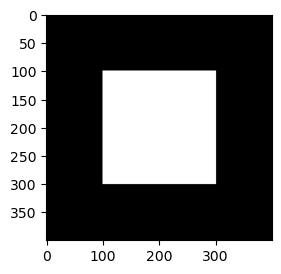

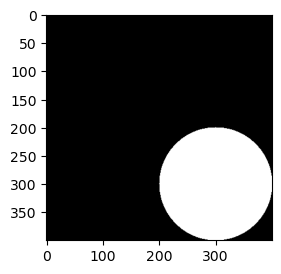

In [29]:
plt.subplot(121)
display_img(rect)
plt.subplot(122)
display_img(circle)

In [30]:
band = cv2.bitwise_and(circle, rect)
bor = cv2.bitwise_or(circle, rect)
bxor = cv2.bitwise_xor(circle, rect)
bnot = cv2.bitwise_not(circle)

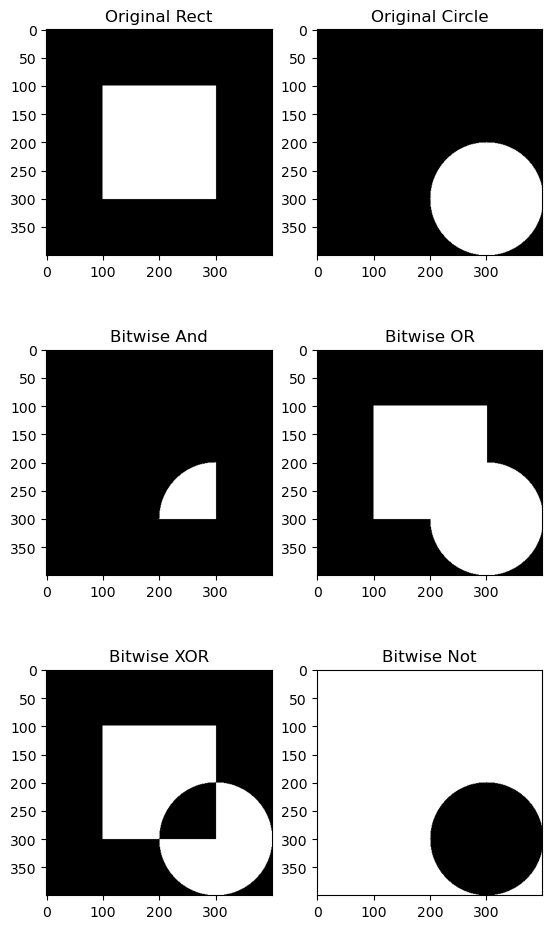

In [31]:
plt.subplot(321)
display_img(rect_cp, 'on', False)
plt.title("Original Rect")
plt.subplot(322)
display_img(circle_cp, 'on', False)
plt.title("Original Circle")
plt.subplot(323)
display_img(band, 'on', False)
plt.title("Bitwise And")
plt.subplot(324)
display_img(bor, 'on', False)
plt.title("Bitwise OR")
plt.subplot(325)
display_img(bxor, 'on', False)
plt.title("Bitwise XOR")
plt.subplot(326)
display_img(bnot, 'on', False)
plt.title("Bitwise Not")
plt.subplots_adjust(top=2)
plt.show()

In [39]:
img1 = cv2.imread(r"C:\Users\errav\Downloads\20200926_181636.jpg", 0)
img2 = cv2.imread(r"C:\Users\errav\Downloads\20200830_124945.jpg",0)

In [40]:
img2 = cv2.resize(img2, img1.shape, interpolation=cv2.INTER_LINEAR)

In [41]:
cv2.imshow("Imag 1", img1)
cv2.imshow("Image 2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
img_and = cv2.bitwise_and(img1, img2)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [44]:
cv2.imshow("Imag 1", img1)
cv2.imshow("Image 2", img2)
cv2.imshow("BitAnd", img_and)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img_and' is not defined

In [18]:
baboon = cv2.imread("Images/bus.jpg",0)

In [19]:
ret, bab = cv2.threshold(baboon, 180,200 , cv2.THRESH_BINARY)

In [20]:
cv2.imshow("Baboon", bab)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
bab_mask = cv2.bitwise_and(baboon, baboon, mask=bab)

In [22]:
cv2.imshow("Baboon", bab_mask)
cv2.waitKey()
cv2.destroyAllWindows()

## Filtering

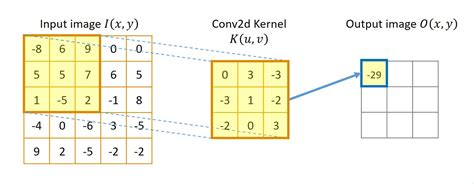

In [37]:
apple = cv2.imread("opencv_images/data/apple.jpg")

In [20]:
kernel = np.ones((5,5), np.int32)/25

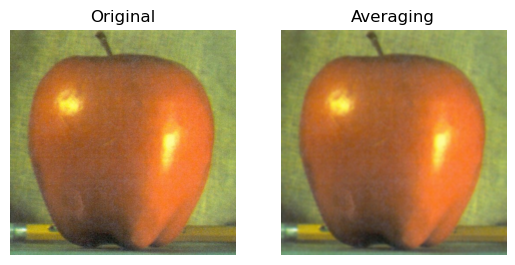

In [23]:
dst = cv2.filter2D(apple,-1,kernel)
plt.subplot(121)
display_img(apple, 'off', False)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
display_img(dst, 'off', False)
plt.title('Averaging')
plt.xticks([])
plt.yticks([])
plt.show()

In [50]:
apple_blur = cv2.blur(apple, (21,21)) # cv2.blur(image, kernel_size)

In [51]:
cv2.imshow("Apple", apple_blur)
cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
apple_bilateral = cv2.bilateralFilter(apple, 5,10,3) # cv2.bilateralFilter(image, radius, stdcolorspace, stdpixelspace)

In [44]:
cv2.imshow("Apple", apple_bilateral)
cv2.waitKey()
cv2.destroyAllWindows()

In [52]:
apple_median = cv2.medianBlur(apple, 21) # cv2.medianBlur(img, kernel size)

In [53]:
cv2.imshow("Apple", apple_median)
cv2.waitKey()
cv2.destroyAllWindows()

can create a Gaussian kernel with the function cv2.getGaussianKernel().

In [54]:
g_filter = cv2.getGaussianKernel(25,255).reshape(5,5)

In [55]:
from scipy.signal import fftconvolve
gaussian_conv = fftconvolve(cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY), g_filter)

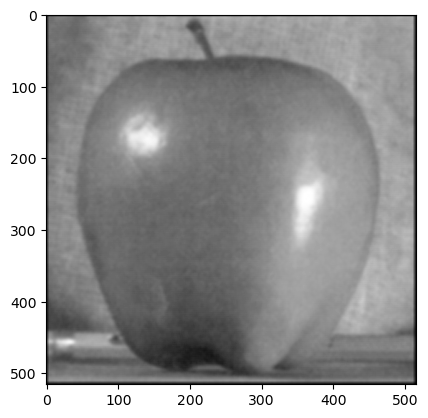

In [56]:
plt.imshow(gaussian_conv, cmap='gray')
plt.show()

In [59]:
gaussian_filter = cv2.GaussianBlur(apple, (21,21), 0) # cv2.GaussianBlur(img, kernelsize in (x,y), stdx)
# if stdx=0 automatically determines from kernel

In [60]:
cv2.imshow("Apple", gaussian_filter)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
## Video Filtering
cap = cv2.VideoCapture(0)

while True:
    cam, frame = cap.read()
    if cam is True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        lower_blue = np.array([101,50,38])
        upper_blue = np.array([110,255,255])

        lower_red = np.array([160,20,70])
        upper_red = np.array([190,255,255])

        lower_green = np.array([36, 25, 25])
        upper_green = np.array([86, 255,255])

        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
        res_blue = cv2.bitwise_and(frame, frame, mask=mask_blue)

        mask_red = cv2.inRange(hsv, lower_red, upper_red)
        res_red = cv2.bitwise_and(frame, frame, mask=mask_red)

        mask_green = cv2.inRange(hsv, lower_green, upper_green)
        res_green = cv2.bitwise_and(frame, frame, mask=mask_green)

        cv2.imshow('frame', frame)
        cv2.imshow('Blue', res_blue)
        cv2.imshow('Red', res_red)
        cv2.imshow('green', res_green)
        
        k = cv2.waitKey(5)
        if k == 27:
            break

cap.release()
cv2.destroyAllWindows()

## TrackBar

In [3]:
import numpy as np
import cv2
def nothing(x):
    pass
  
# Creating a window with black image
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')
  
# creating trackbars for red color change
cv2.createTrackbar('R', 'image', 0, 255, nothing)
  
# creating trackbars for Green color change
cv2.createTrackbar('G', 'image', 0, 255, nothing)
  
# creating trackbars for Blue color change
cv2.createTrackbar('B', 'image', 0, 255, nothing)
  
while(True):
    # show image
    cv2.imshow('image', img)
  
    # for button pressing and changing
    k = cv2.waitKey(1)
    try:
        r = cv2.getTrackbarPos('R', 'image')
        g = cv2.getTrackbarPos('G', 'image')
        b = cv2.getTrackbarPos('B', 'image')
        img[:] = [b, g, r]
    except:
        break
    if k == 27 or k==0:
        break
cv2.destroyAllWindows()

## HSV Colorspace

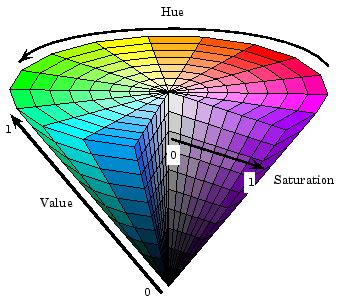

In [2]:
# Object Highlighting
import cv2
import numpy as np
def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    frame = cv2.imread('opencv_images/data/smarties.png')

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")

    u_h = cv2.getTrackbarPos("UH", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, l_b, u_b)

    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
cap = cv2.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of Red color in HSV
    lower_red = np.array([0,14,32])
    upper_red = np.array([52,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_red, upper_red)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
# Object Highlighting
def nothing(n):
    pass
cap = cv2.VideoCapture(0)
cv2.namedWindow("Tracking", cv2.WINDOW_NORMAL)
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    try:
        l_h = cv2.getTrackbarPos("LH", "Tracking")
        l_s = cv2.getTrackbarPos("LS", "Tracking")
        l_v = cv2.getTrackbarPos("LV", "Tracking")

        u_h = cv2.getTrackbarPos("UH", "Tracking")
        u_s = cv2.getTrackbarPos("US", "Tracking")
        u_v = cv2.getTrackbarPos("UV", "Tracking")
    
        l_b = np.array([l_h, l_s, l_v])
        u_b = np.array([u_h, u_s, u_v])
        mask = cv2.inRange(hsv, l_b, u_b)
    except:
        mask=None
    # Threshold the HSV image to get only blue colors
    #mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    #cv2.imshow('frame',frame)
    #cv2.imshow('mask',mask)
    cv2.imshow('Tracking',res)
    k = cv2.waitKey(5)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

## Affine Transformations
Affine Transformation helps to modify the geometric structure of the image, preserving parallelism of lines but not the lengths and angles
    

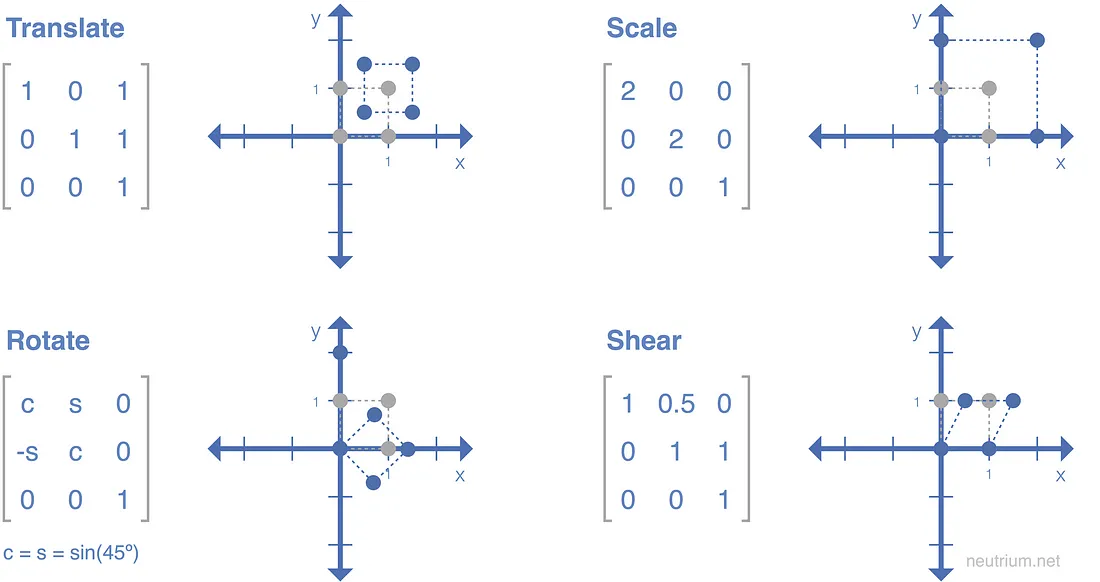

1. Translation 
     A translation is a function that moves every point with a constant distance in a specified direction.


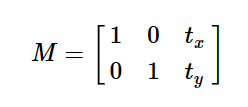

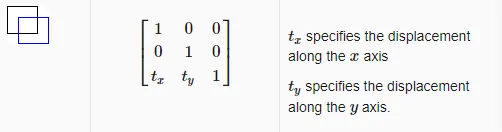

In [2]:
image = cv2.imread("opencv_images/data/home.jpg")
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
  
cv2.imshow("Originalimage", image)
cv2.imshow('Translation', img_translation)
cv2.waitKey()
  
cv2.destroyAllWindows()

# 2. Rotation

Rotation of an image for an angle θ is achieved by the transformation matrix of the form
OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location


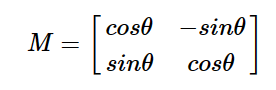



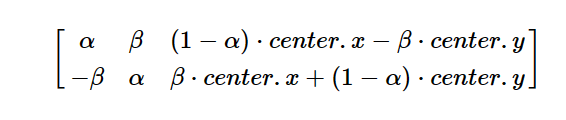

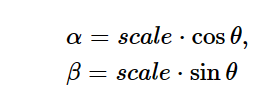

In [3]:
# Image Rotation
img = cv2.imread('opencv_images/data/messi5.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow("Messi", img)
cv2.imshow("Rotated", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

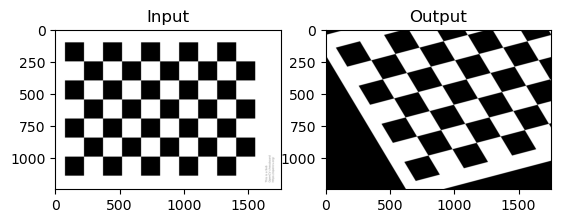

In [4]:
img = cv2.imread('opencv_images/data/chessboard.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

perspective transformation, needed a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function

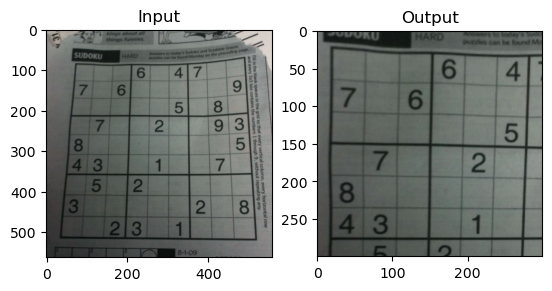

In [5]:
img = cv2.imread('opencv_images/data/sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Canny Edge Detection

Steps
1. Noise Reduction

   edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter.
2. Finding Intensity Gradient of the Image

   Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy). From these two images, we can find edge gradient and direction for each pixel

    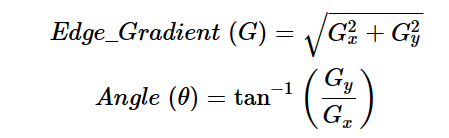
    
    The edge direction angle is rounded to one of four angles representing vertical, horizontal, and the two diagonals (0°, 45°, 90°, and 135°). An edge direction falling in each color region will be set to a specific angle value, for instance, θ in [0°, 22.5°] or [157.5°, 180°] maps to 0°.
    
    
3. Non-maximum Suppression

   After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge
   
   

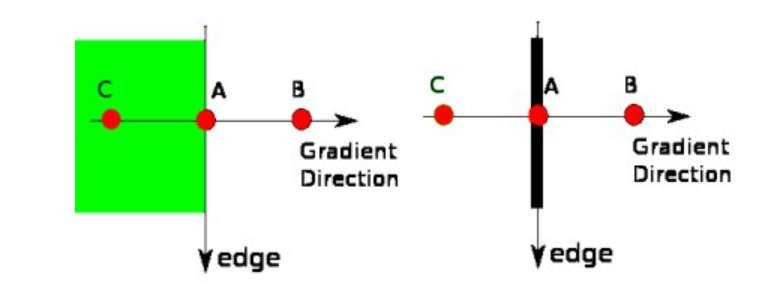

Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

4. Hysteresis Thresholding

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded

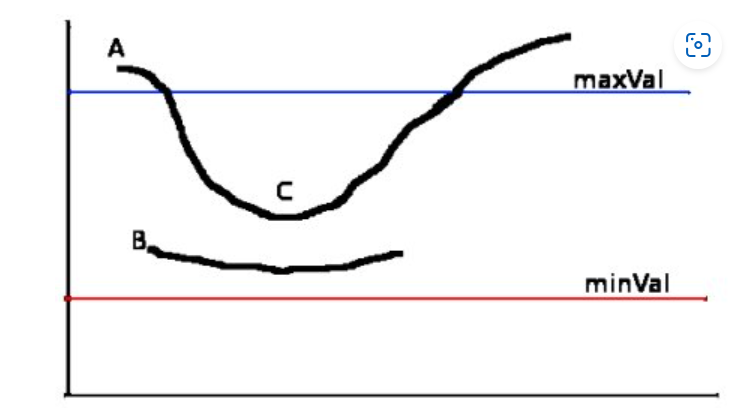

The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

In [9]:
## Canny Edge Detection
img  = cv2.imread("opencv_images/data/LinuxLogo.jpg")
edges = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), threshold1=250, threshold2=255)

In [10]:
cv2.imshow("Canny Edge", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
squirrel = cv2.imread("opencv_images/data/squirrel_cls.jpg", 0)
edges = cv2.Canny(squirrel, threshold1=240, threshold2=250)
cv2.imshow("Canny Edge", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# Edge Detection using Videos
cap = cv2.VideoCapture(0)

while True:

    check, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if check:
        # applying canny edge transformation
        edges = cv2.Canny(gray, threshold1=50, threshold2=80)

        # showing the output frame
        cv2.imshow('Original',frame)
        cv2.imshow('Edges', edges)

        if cv2.waitKey(5)== 27:
            break

cap.release()
cv2.destroyAllWindows()

# BackGround Remover

In [17]:
# BackGround Remover
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorKNN()

while True:
    ret, frame = cap.read()
    if ret:    
        fgmask = fgbg.apply(frame)
        
        cv2.imshow('frame', fgmask)

        k = cv2.waitKey(5)
        if k == 27:
            break

cap.release()
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    
    cv2.imshow('frame', fgmask)

    k = cv2.waitKey(5)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
# Face Blur
prototxt_path = "assets/deploy.prototxt.txt"
model_path = "assets/res10_300x300_ssd_iter_140000_fp16.caffemodel"

model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

cap = cv2.VideoCapture(0)

while True:
    start = time.time()
    _, image = cap.read()
    # get width and height of the image
    h, w = image.shape[:2]
    kernel_width = (w // 7) | 1
    kernel_height = (h // 7) | 1
    # preprocess the image: resize and performs mean subtraction
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
    # set the image into the input of the neural network
    model.setInput(blob)
    # perform inference and get the result
    output = np.squeeze(model.forward())
    for i in range(0, output.shape[0]):
        confidence = output[i, 2]
        # get the confidence
        # if confidence is above 40%, then blur the bounding box (face)
        if confidence > 0.4:
            # get the surrounding box cordinates and upscale them to original image
            box = output[i, 3:7] * np.array([w, h, w, h])
            # convert to integers
            start_x, start_y, end_x, end_y = box.astype('int')
            # get the face image
            face = image[start_y: end_y, start_x: end_x]
            # apply gaussian blur to this face
            face = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)
            # put the blurred face into the original image
            image[start_y: end_y, start_x: end_x] = face
    cv2.imshow("image", image)
    if cv2.waitKey(1) == ord("q"):
        break
    time_elapsed = time.time() - start
cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "assets/deploy.prototxt.txt" in function 'cv::dnn::ReadProtoFromTextFile'


In [20]:
# Face Detection
confThresh = 0.5
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

cam=cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()
    frame = cv2.flip(frame, 1)
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    net.setInput(blob)
    detections = net.forward()
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence < confThresh:
            continue

        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 0, 255), 2)
        
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

cam.release()
cv2.destroyAllWindows()

faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
)


gray: This specifies the use of the OpenCV grayscale image object that you loaded earlier.

scaleFactor: This parameter specifies the rate to reduce the image size at each image scale. Your model has a fixed scale during training, so input images can be scaled down for improved detection. This process stops after reaching a threshold limit, defined by maxSize and minSize.

minNeighbors: This parameter specifies how many neighbors, or detections, each candidate rectangle should have to retain it. A higher value may result in less false positives, but a value too high can eliminate true positives.

minSize: This allows you to define the minimum possible object size measured in pixels. Objects smaller than this parameter are ignored

In [23]:
## HAAR Cascade
# face detection and Eye
face_cascade = cv2.CascadeClassifier('opencv_models/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv_models/haarcascades/haarcascade_eye.xml')


def detectedFace(img):
    img = cv2.imread(img)
    img = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_LINEAR)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=1, minSize=(30,30))

    for face in faces:
        x, y, width, height = face
        # draw a rectangle for detection
        cv2.rectangle(
                img,
                (x, y),
                (x + width, y + height),
                (0, 0, 255),
                1,
        )
        roi_gray = gray[y:y+height, x:x+width]
        roi_color = img[y:y+height, x:x+width]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(
                    roi_color,
                    (ex, ey),
                    (ex+ew, ey+eh),
                    (0, 255, 0),
                    2,
            )

    cv2.imshow('Face Detection', img)
    k = cv2.waitKey(0)

    if k == 27:
        cv2.destroyAllWindows()
    elif k == ord('s'):
        cv2.imwrite('Images/face_detected.jpeg', img)
        cv2.destroyAllWindows()
        
path_img = 'Images/face_detect.jpg'
detectedFace(path_img)

In [25]:
# Face and Smile
face_cascade = cv2.CascadeClassifier('opencv_models/haarcascades/haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('opencv_models/haarcascades/haarcascade_smile.xml')

img = cv2.imread("Images/face_detect.jpg")
img = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_LINEAR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3, minSize=(30,30))

for face in faces:
    x, y, width, height = face
    # draw a rectangle for detection
    cv2.rectangle(
            img,
            (x, y),
            (x + width, y + height),
            (0, 0, 255),
            1,
    )
    roi_gray = gray[y:y+height, x:x+width]
    roi_color = img[y:y+height, x:x+width]

    smile = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.3, minNeighbors=5, minSize=(50,50))
    for (ex, ey, ew, eh) in smile:
        cv2.rectangle(
                roi_color,
                (ex, ey),
                (ex+ew, ey+eh),
                (0, 255, 0),
                2,
        )

cv2.imshow('Face Detection', img)
k = cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite('Images/face_detected.jpeg', img)
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows()

In [26]:
face_cascade = cv2.CascadeClassifier('opencv_models/haarcascades/haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('opencv_models/haarcascades/haarcascade_smile.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y: y + h, x: x + w]
        roi_color = frame[y: y + h, x: x + w]
        
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
    
    cv2.imshow('Smile Detection', frame)
    k = cv2.waitKey(30)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

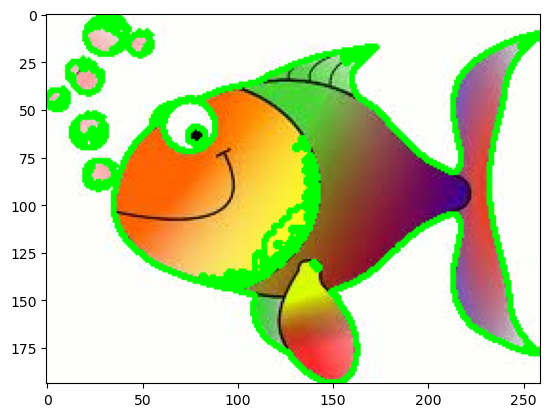

In [27]:
## Contour Detection
#Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity
# read the image
image = cv2.imread('opencv_images/data/HappyFish.jpg')
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [31]:
# Shape Detection
img  = cv2.imread('opencv_images/data/smarties.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(11,11),0) #The values need to be >1 and odd

# creating binary thresholding
ret, th = cv2.threshold(blur,220,255,cv2.THRESH_BINARY_INV) # Inverse Binary thresholding technique

# finding and drawing contour
(cnts,_) = cv2.findContours(th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,cnts,-1,(0,0,0),2)

cv2.imshow('image',img)
#cv2.imwrite("Images/Shape_Detected.png",img) # Save the contoured image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
# Template Matching
img_rgb = cv2.imread('opencv_images/data/lena.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('opencv_images/data/lena_tmpl.jpg',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imshow("Result", img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()